## Análisis de la cardiotocografía en la clasificación de la salud fetal

### Introducción

Este proyecto pretende analizar registros cardiotocográficos fetales para estudiar la relación entre características de la cardiotocografía (CTG) y la evaluación del estado fetal. La CTG es un método de evaluación fetal que registra simultáneamente la frecuencia cardiaca, los movimientos fetales y las contracciones uterinas. Estas mediciones pueden ayudar a los profesionales de la salud a verificar el estado general del feto y a identificar las primeras señales de sufrimiento fetal. Sin embargo, se producen muchos falsos positivos, por lo que encontrar una relación causal podría permitir mejorar la clasificación de la salud fetal.

Se han utilizado los siguientes Datasets:<br>
* [Fetal Health Classification](https://www.kaggle.com/andrewmvd/fetal-health-classification)
* [Fetal cardiotocography data](https://www.kaggle.com/akshat0007/fetalhr)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils.functions import *


In [2]:
fetal = pd.read_csv('data/fetal_health.csv')
ctg = pd.read_csv('data/CTG.csv')

In [3]:
fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
ctg.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


### EDA

Analizamos los valores que tienen cada una de las tablas:

In [5]:
fetal.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [6]:
ctg.dtypes

FileName     object
Date         object
SegFile      object
b           float64
e           float64
LBE         float64
LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
DR          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
A           float64
B           float64
C           float64
D           float64
E           float64
AD          float64
DE          float64
LD          float64
FS          float64
SUSP        float64
CLASS       float64
NSP         float64
dtype: object

Comprobamos si existen valores nulos en las filas de los Datasets:

In [7]:
row_nan_fetal = fetal[fetal.isnull().any(1)]
print(f'FETAL: Hay {len(row_nan_fetal)} filas con NaN')
row_nan_ctg = ctg[ctg.isnull().any(1)]
print(f'CTG: Hay {len(row_nan_ctg)} filas con NaN')

FETAL: Hay 0 filas con NaN
CTG: Hay 3 filas con NaN


Eliminamos los valores NaN teniendo en cuenta la columna NSP, ya que necesitamos saber la clasificación:

In [8]:
ctg.dropna(subset=['NSP'],inplace=True)

El Dataset ***ctg*** contiene variables con valores complementarios al Dataset ***fetal***. Sin embargo, existen variables repetidas en ambas tablas, a continuación se muestran las variables correspondientes entre las tablas:

|Variable fetal|Variable ctg|
|---|---|
|baseline value|LB|
|accelerations|AC|
|fetal_movement|FM|
|uterine_contractions|UC|
|abnormal_short_term_variability|MSTV|
|mean_value_of_short_term_variability|ASTV|
|percentage_of_time_with_abnormal_long_term_variability|ALTV|
|mean_value_of_long_term_variability|MLTV|
|fetal_health|NSP|

Creamos el Dataframe:
1. Eliminamos las columnas de los histogramas y las que contengan variables repetidas.
2. Renombramos las columnas.
3. Juntamos los dataset.

In [9]:
fetal_drop = fetal.drop(columns=['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'])

ctg_drop = ctg.drop(columns=['FileName','SegFile','LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV','Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency','NSP'])

In [10]:
fetal_drop.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'fetal_health'],
      dtype='object')

In [11]:
fetal_drop.rename(columns={'baseline value':'Baseline_FHR',
                            'abnormal_short_term_variability':'abnormal_STV',
                            'mean_value_of_short_term_variability':'mean_STV',
                            'percentage_of_time_with_abnormal_long_term_variability':'abnormal_LTV',
                            'mean_value_of_long_term_variability':'mean_LTV',
                            'fetal_health':'index_NSP'}, inplace=True)

In [12]:
df = pd.concat([fetal_drop,ctg_drop],axis=1)
df.head()

,Baseline_FHR,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_STV,mean_STV,abnormal_LTV,...,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [13]:
len(df)

2126

El dataset está formado por 2126 registros extraídos de exámenes Cardiotocográficos. Los registros fueron clasificados en 3 clases:
* Normal = 1
* Sospechoso = 2
* Patológico = 3 

In [14]:
%matplotlib inline
sns.set(color_codes=True)
# plt.style.use('seaborn')

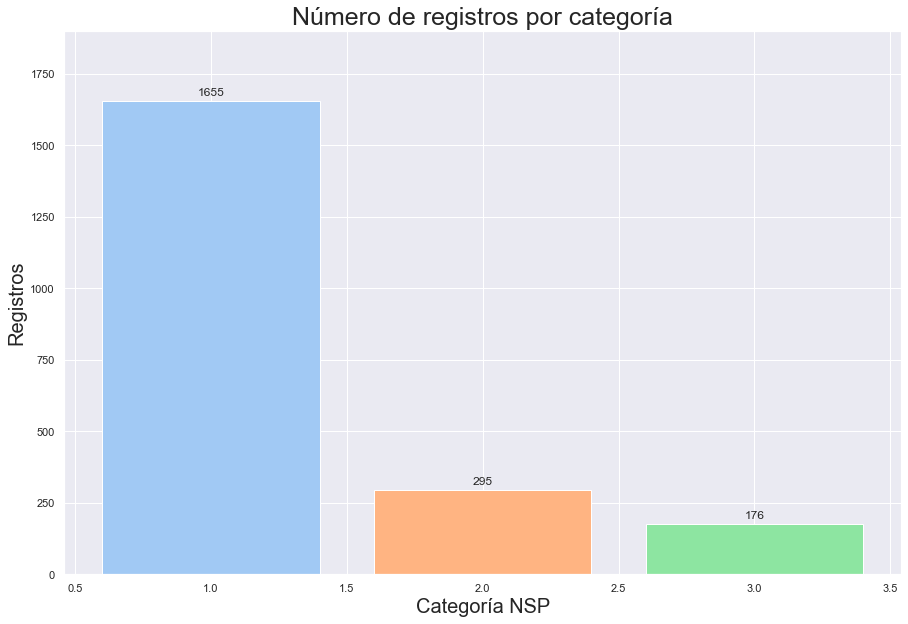

In [15]:
plt.figure(figsize=(15,10))

val = df['index_NSP'].value_counts().reset_index()
colors = sns.color_palette('pastel')[:5]

for i in plt.bar(x=val['index'],height=val['index_NSP'],color=colors):
    plt.text(i.get_x()+i.get_width()/2,i.get_height()+20,i.get_height(),ha='center') 
    
plt.title('Número de registros por categoría',size=25)
plt.xlabel('Categoría NSP',size=20)
plt.ylabel('Registros',size=20)
plt.ylim(0,1900);
plt.savefig('Registros_cat.png')


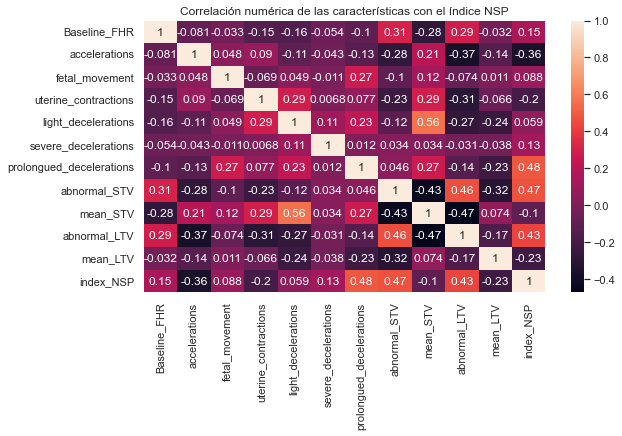

In [16]:
plt.figure(figsize=(9,5))
sns.heatmap(df.iloc[:,:13].corr(), annot=True)
plt.title('Correlación numérica de las características con el índice NSP');
plt.savefig('Corr_var.png')

A simple vista, se observa que existen ciertas correlaciones entre diferentes variables. El propósito de este trabajo es estudiar la relación de las variables del registro cardiotocográfico con el índice de salud fetal.

In [17]:
carac_coor = df.iloc[:,:13].corr()['index_NSP'].sort_values(ascending=False).head(12).to_frame()

col_map = sns.light_palette('#5F9EA0',as_cmap=True)
style = carac_coor.style.background_gradient(cmap=col_map)
style

,index_NSP
index_NSP,1.000000
prolongued_decelerations,0.484859
abnormal_STV,0.471191
abnormal_LTV,0.426146
Baseline_FHR,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
light_decelerations,0.058870
mean_STV,-0.103382
uterine_contractions,-0.204894


Se observa que el índice de salud fetal muestra una correlación positiva con las desaceleraciones prolongadas, así como con las variables de STV y STL anormales. Además, muestra una correlación negativa con las aceleraciones, la media STV y LTV y las contracciones uterinas. Estas variables se estudiarán en profundidad a lo largo del trabajo.

Descripción de las variables utilizadas:

1. **`Baseline_FHR`** (Fetal Heart Rate): La frecuencia cardiaca fetal promedio se encuentra entre 110 y 160 lpm (latidos por minuto).

2. **`Accelerations`**: Las aceleraciones son aumentos a corto plazo de la frecuencia cardiaca de al menos 15 lpm por encima de la línea basal. 

3. **`Uterine_contractions`**: Las contracciones uterinas se cuantifican midiendo el número de contracciones en una ventana de 10 min, promediando a un periodo de 30 minutos.

4. **`Decelerations`**: Las desaceleraciones son episodios transitorios de disminución de la FHR por debajo de la línea base de más de 15 lpm que duran al menos 15 seg. Aunque cada desaceleración tiene un mecanismo fisiológico levemente diferente, todas ellas son consecuencia de una interrupción del camino del oxígeno.

5. **`Variability`**: La variabilidad de la FHR de la línea de base se determina en una ventana de 10 minutos, excluyendo aceleraciones y deceleraciones. Se trata de fluctuaciones que son irregulares en amplitud y frecuencia.

    * **`Short Term Variability`** (STV): Se trata de la oscilación de la FHR alrededor de la línea de base en una amplitud de 5 a 10 lpm.  
    * **`Long Term Variability`** (LTV): En este caso, la amplitud es de 10 a 25 lpm.



#### Estudio de la relación de las variables

- ***Relación entre la FHR basal y el índice NSP***

Dado que el rango normal de la FHR es 110-160 lpm, se espera que valores fuera del rango se relacionen con índices Sospechosos o Patológicos.<br><br>
**Hipótesis secundaria:**

> *La frecuencia cardiaca basal fuera del rango 110-160 lpm indica sufrimiento fetal.*

In [18]:
print(f'Valor mínimo FHR: {df["Baseline_FHR"].min()}\
    \nValor máximo FHR: {df["Baseline_FHR"].max()}')

Valor mínimo FHR: 106.0    
Valor máximo FHR: 160.0


El rango de valores se encuentra entre 106-160 lpm para todo el conjunto de datos. Dado que tenemos índices Normales, Sospechosos y Patológicos, esto puede indicar que la FHR no está relacionada con el índice NSP.

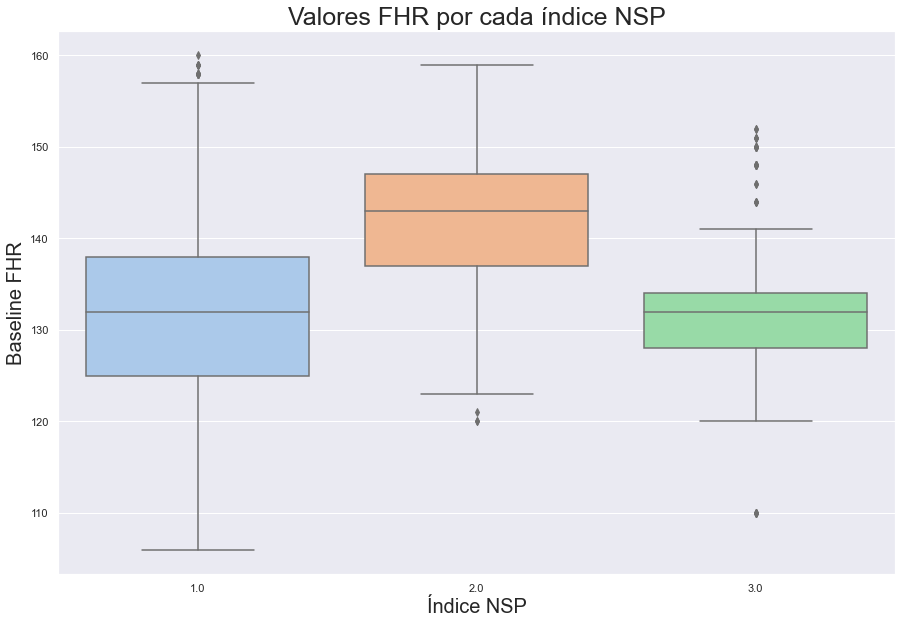

In [19]:
plt.figure(figsize=(15,10))
# sns.set(font_scale=1.5)
sns.boxplot(x='index_NSP',y='Baseline_FHR',data=df,palette='pastel')
plt.title('Valores FHR por cada índice NSP', fontsize=25)
plt.xlabel('Índice NSP',fontsize=20)
plt.ylabel('Baseline FHR',fontsize=20);
plt.savefig('FHR_NSP.png')

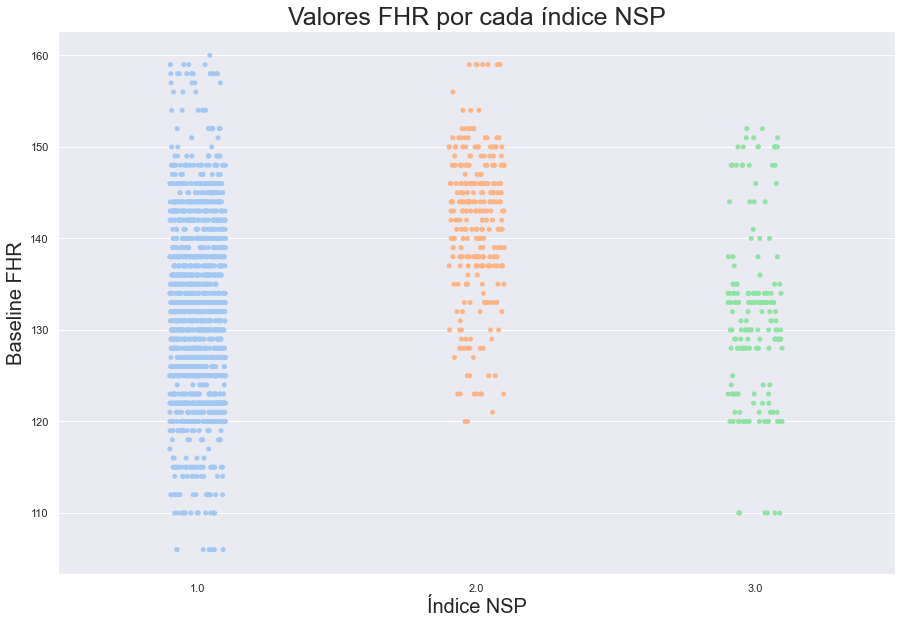

In [20]:
plt.figure(figsize=(15,10))
sns.stripplot(x='index_NSP',y='Baseline_FHR',data=df,jitter=True,palette='pastel')
plt.title('Valores FHR por cada índice NSP', fontsize=25)
plt.xlabel('Índice NSP',fontsize=20)
plt.ylabel('Baseline FHR',fontsize=20);
plt.savefig('FHR_NSP_2.png')

Se puede observar una concentración de valores para el caso Normal entre 120-150 lpm. Para el caso Sospechoso, los valores se concentran entre 135-155 lpm. Sin embargo, para el caso Patológico se muestra una distribución más dispersa.

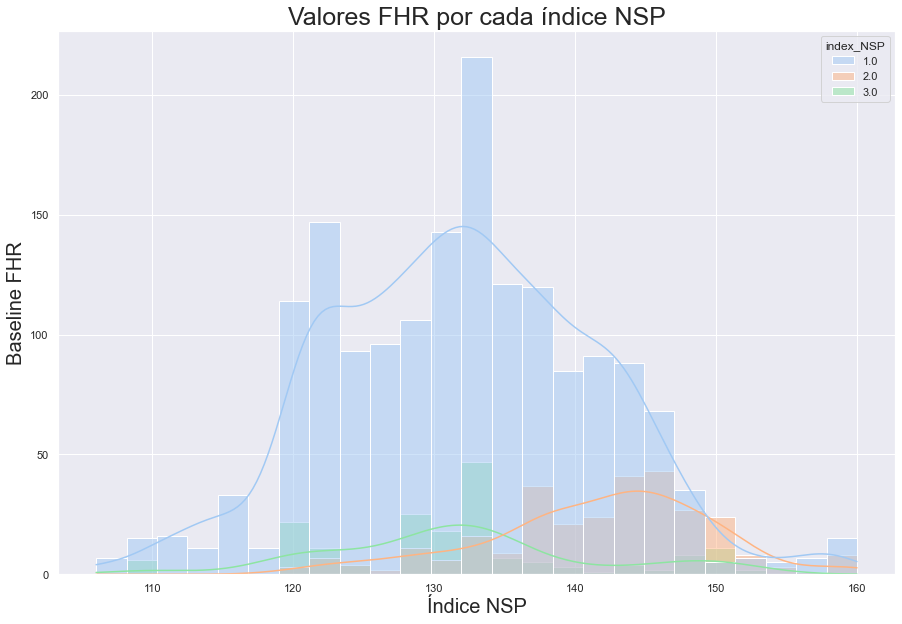

In [21]:
plt.figure(figsize=(15,10))
# sns.set(font_scale=1.5)
sns.histplot(x='Baseline_FHR',data=df,hue='index_NSP',kde=True,palette='pastel')
plt.title('Valores FHR por cada índice NSP', fontsize=25)
plt.xlabel('Índice NSP',fontsize=20)
plt.ylabel('Baseline FHR',fontsize=20);
plt.savefig('FHR_NSP_3.png')

La distribución de los valores en los casos patológicos y normales se asemeja bastante, es una distribución casi normal con mayor concentración en valores intermedios. Para los casos sospechosos se observa una distribución sesgada a la derecha, contiene valores de FHR más altos. Sin embargo, sus valores también se encuentran dentro del rango normal.<br><br>
Por lo tanto, parece que la FHR basal **no tiene relación** con la predicción de la salud fetal.

- ***Aceleraciones e índice NSP***

Las aceleraciones son normales y saludables ya que indican que el feto tiene un suministro adecuado de oxígeno, por lo tanto, se espera que esté relacionado con un índice Normal.<br><br>
**Hipótesis secundaria:**

> *La aceleración de la frecuencia cardiaca fetal tiene una correlación negativa con la mortalidad fetal.*

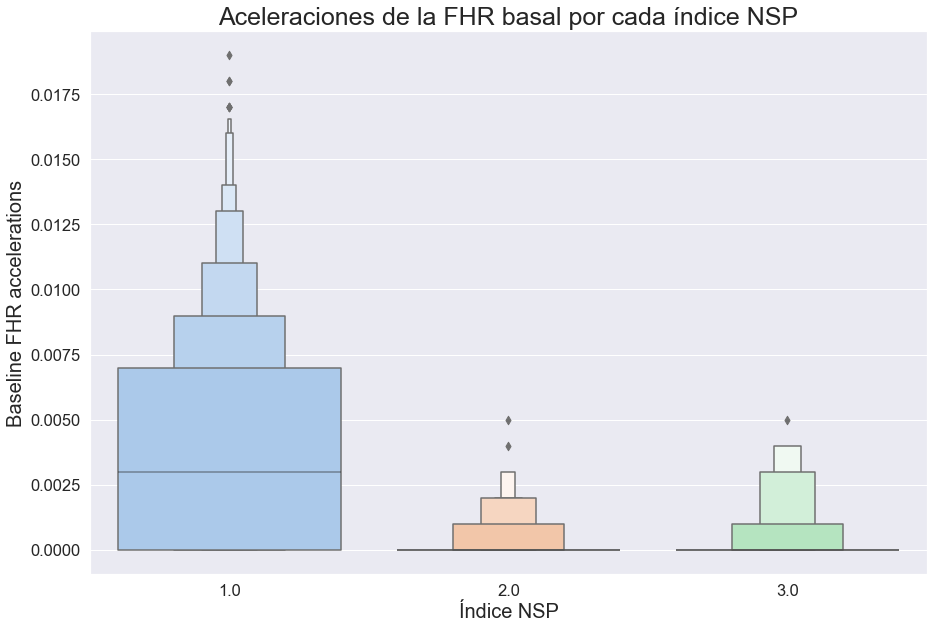

In [22]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.boxenplot(x='index_NSP',y='accelerations',data=df,palette='pastel')
# sns.boxplot(x='index_NSP',y='accelerations',data=df,palette='pastel')
plt.title('Aceleraciones de la FHR basal por cada índice NSP', fontsize=25)
plt.xlabel('Índice NSP',fontsize=20)
plt.ylabel('Baseline FHR accelerations',fontsize=20);
plt.savefig('Ac_NSP.png')

A primera vista se puede observar que el valor de la mediana para los casos Sospechosos y Patológicos es de 0, lo que indica que en ambos casos se producen pocas aceleraciones ya que al menos la mitad de los casos serían 0.<br>

Para los casos Normales, se visualizan valores de aceleraciones más altos, mientras que en los casos Sospechosos y Patológicos no sobrepasan de 0.0050. Será necesario observar la presencia de aceleraciones para cada caso.

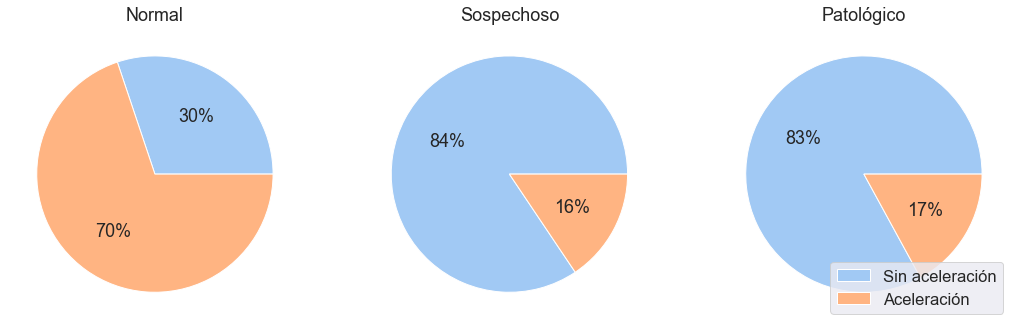

In [23]:
# plt.figure(figsize=(20,15))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

# fig.subplots_adjust(wspace=.2) 

ax1.pie(ac_lista(df,1),colors=colors, autopct='%.0f%%')
ax2.pie(ac_lista(df,2),colors=colors, autopct='%.0f%%')
ax3.pie(ac_lista(df,3),colors=colors, autopct='%.0f%%')

ax1.set(title='Normal')
ax2.set(title='Sospechoso')
ax3.set(title='Patológico')

label = ['Sin aceleración','Aceleración']

# fig.suptitle('Presencia de aceleraciones')
# plt.subplots_adjust(top=0.8<5, bottom=0.15)
plt.legend(loc='lower right',labels=label)

fig.set_size_inches(18, 10.5);
plt.savefig('Ac_porc.png')

In [24]:
df[df['accelerations']!=0].groupby('index_NSP')[['accelerations']].mean().round(4)

,accelerations
index_NSP,
1.0,0.0057
2.0,0.0018
3.0,0.0023


En la gráfica se observa que para los rangos Sospechosos y Patológicos, el 84 y 83% de los registros respectivos no presenta aceleraciones. Además, la media de las aceleraciones registradas es mucho más baja que en el caso Normal. Por lo tanto, parece que los casos Sospechosos y Patológicos experimentan poca o ninguna aceleración.

En conclusión, existen indicios de que la presencia de aceleraciones de la frecuencia cardiaca fetal está **relacionada** con el bienestar fetal.

- ***Contracciones uterinas e índice NSP***

Las contracciones indican el progreso del parto. El rango normal de contracciones uterinas es entre 3-5 contracciones en 10 minutos, es decir, 0.005-0.008 contracciones/seg. Valores fuera del rango deberían indicar un compromiso fetal.<br><br>
Se intentará buscar una relación entre las contracciones fetales y el estado fetal.

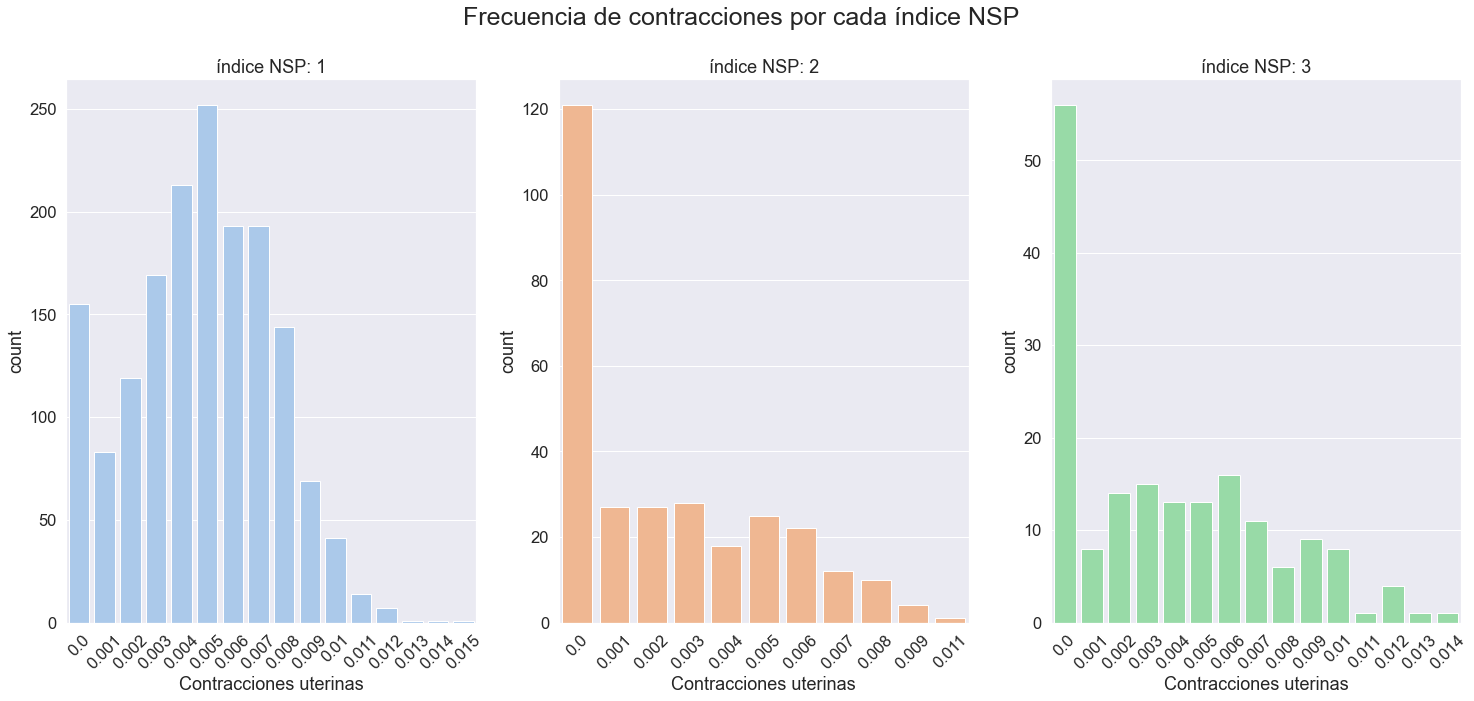

In [25]:
fig, ax = plt.subplots(1,3, figsize=(25,10))
color_NSP = [lista_NSP(colors,0),lista_NSP(colors,1),lista_NSP(colors,2)]

for i in range(0,3):
    sns.countplot(x="uterine_contractions",data=df[df['index_NSP']==(i+1)],ax=ax[i],palette=color_NSP[i])
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].set(xlabel='Contracciones uterinas',title=f'índice NSP: {i+1}')

fig.suptitle('Frecuencia de contracciones por cada índice NSP', fontsize=25);
plt.savefig('Contrac_NSP.png')

In [26]:
df.groupby('index_NSP')[['uterine_contractions']].mean().round(3)

,uterine_contractions
index_NSP,
1.0,0.005
2.0,0.002
3.0,0.004


En comparación con los casos Normales, cuya distribución se encuentra principalmente dentro de los rangos normales, la media de los casos Sospechosos y Patológicos se encuentra ligeramente por debajo del rango normal. En los gráficos se puede observar que para los casos Sospechosos y Patológicos, los valores se concentran principalmente a la izquierda, esto significa que en la mayoría de registros no se produjeron contracciones. Además, en los casos patológicos se pueden observar valores muy altos en la frecuencia de contracciones que implican una hiperestimulación uterina.

Para entender mejor la relación de las contracciones uterinas con el índice NSP, estudiaremos su correlación con otras variables dependiendo del índice NSP.

In [27]:
uc_corr_N = df[df['index_NSP']==1].iloc[:,:13].corr()['uterine_contractions'].sort_values(ascending=False).head(11).to_frame().reset_index()
uc_corr_S = df[df['index_NSP']==2].iloc[:,:13].corr()['uterine_contractions'].sort_values(ascending=False).head(11).to_frame().reset_index()
uc_corr_P = df[df['index_NSP']==3].iloc[:,:13].corr()['uterine_contractions'].sort_values(ascending=False).head(11).to_frame().reset_index()

df_corr_UC = uc_corr_N.merge(uc_corr_S,on='index').merge(uc_corr_P,on='index')
df_corr_UC.rename(columns={'uterine_contractions_x':'UC_Normal','uterine_contractions_y':'UC_Sospechoso','uterine_contractions':'UC_Patológico'},inplace=True)
df_UC = df_corr_UC.style.background_gradient(cmap=col_map)
df_UC

,index,UC_Normal,UC_Sospechoso,UC_Patológico
0,uterine_contractions,1.000000,1.000000,1.000000
1,light_decelerations,0.218168,0.187124,0.586330
2,mean_STV,0.115018,0.291365,0.755323
3,prolongued_decelerations,0.089690,0.197134,0.298083
4,severe_decelerations,0.028728,nan,0.019874
5,accelerations,-0.028065,0.120595,0.120152
6,abnormal_LTV,-0.045232,-0.258423,-0.603896
7,abnormal_STV,-0.050826,-0.436166,-0.420877
8,fetal_movement,-0.058704,-0.008102,-0.125463
9,Baseline_FHR,-0.067296,0.145435,-0.231651


Se puede observar que para cada índice NSP las variables no tienen la misma correlación con las contracciones uterinas. Esto puede indicar que hay variables que no afectan por igual al estado de salud fetal ya que existe dependencia con otras variables. En el caso Patológico, las contracciones uterinas muestran una alta correlación con las deceleraciones (0.59 - ligeras y 0.30 - prolongadas) y el MSTV (0.75).

Se intentará encontrar una relación entre las variables correlacionadas y el estado de salud fetal.

In [28]:
df_Dec = df.groupby('index_NSP')[['light_decelerations','prolongued_decelerations']].mean().round(4).reset_index()
df_Dec

,index_NSP,light_decelerations,prolongued_decelerations
0,1.0,0.0019,0.0001
1,2.0,0.0005,0.0001
2,3.0,0.0037,0.0013


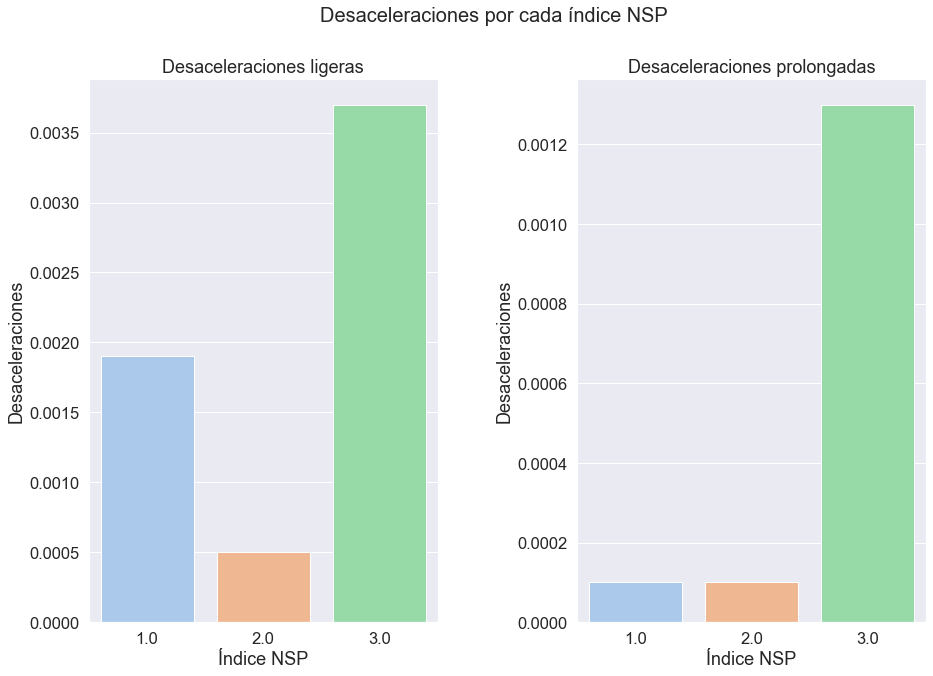

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

fig.subplots_adjust( wspace=0.4)

sns.barplot(x='index_NSP',y='light_decelerations',data=df_Dec,palette='pastel',ax=ax[0])
sns.barplot(x='index_NSP',y='prolongued_decelerations',data=df_Dec,palette='pastel',ax=ax[1]);

ax[0].set(xlabel='Índice NSP',ylabel='Desaceleraciones',title='Desaceleraciones ligeras')
ax[1].set(xlabel='Índice NSP',ylabel='Desaceleraciones',title='Desaceleraciones prolongadas')

fig.suptitle('Desaceleraciones por cada índice NSP', fontsize=20);
plt.savefig('Desac.png')

Visualmente se observa que la media de las deceleraciones en los casos Patológicos es mayor que en los casos Normales y Sospechosos, apreciandose más la diferencia en las deceleraciones prolongadas (aquellas que tienen una duración >= 2 minutos pero < 10 minutos).

Estos resultados pueden indicar que existe una relación entre el índice Patológico y la presencia de deceleraciones. Dado que las deceleraciones muestran una correlación positiva con las contracciones uterinas de índice Patológico, se podría deducir que las contracciones uterinas tienen un **efecto indirecto** en el estado de salud fetal.

- ***Variabilidad e índice NSP***

En la base de datos, se tienen valores de variabilidad a corto plazo y a largo plazo. Actualmente no se establece distinción entre ambas variables por lo que se estudiaran en conjunto.

In [30]:
df_V = df[['abnormal_STV','abnormal_LTV','index_NSP']]
#Valores mínimos y máximos de cada variabilidad, servirán para crear los rangos.
print(df_V['abnormal_STV'].min())
print(df_V['abnormal_STV'].max())
print(df_V['abnormal_LTV'].min())
print(df_V['abnormal_LTV'].max())


12.0
87.0
0.0
91.0


Se crearán 2 nuevas columnas agrupando los valroes STV y LTV en 5 grupos:<br>
* Rangos: (-18) [18-36) [36-54) [54-72) [72-)

In [31]:
df_V['group_STV'] = df.apply(class_STV,axis=1)
df_V['group_LTV'] = df.apply(class_LTV,axis=1)

C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
df_V_porc = pd.DataFrame({'STV':porcentaje(df_V,'group_STV'),
                          'LTV':porcentaje(df_V,'group_LTV'),
                          'index_NSP':[1,2,3,1,2,3,1,2,3,1,2,3,1,2,3],
                          'group':[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]})

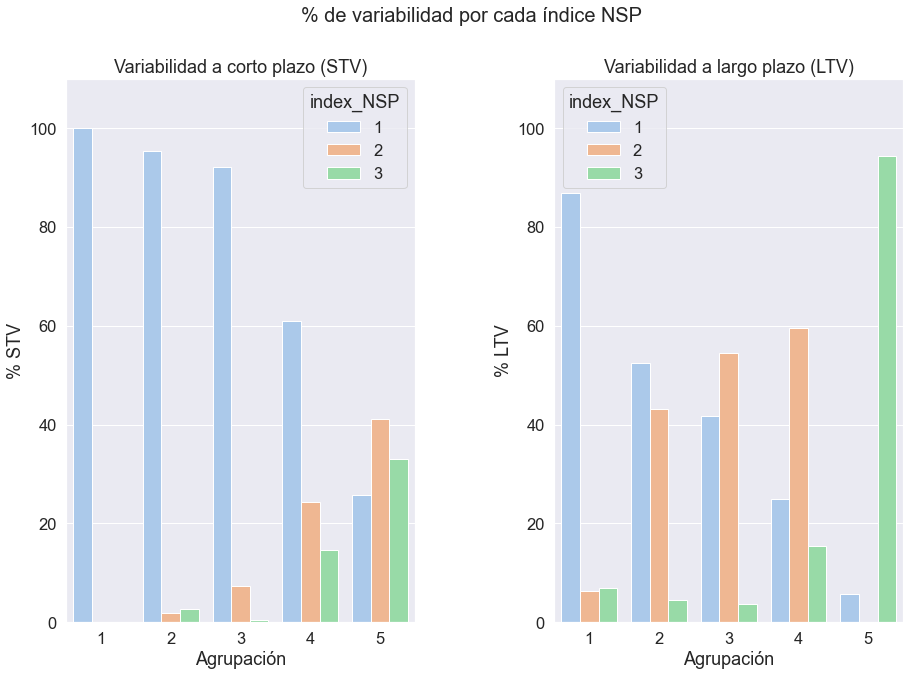

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

fig.subplots_adjust( wspace=0.4)

sns.barplot(x='group',y='STV',data=df_V_porc,hue='index_NSP',palette='pastel',ax=ax[0])
sns.barplot(x='group',y='LTV',data=df_V_porc,hue='index_NSP',palette='pastel',ax=ax[1]);

ax[0].set(xlabel='Agrupación',ylabel='% STV',title='Variabilidad a corto plazo (STV)',ylim=(0,110))
ax[1].set(xlabel='Agrupación',ylabel='% LTV',title='Variabilidad a largo plazo (LTV)',ylim=(0,110))

fig.suptitle('% de variabilidad por cada índice NSP', fontsize=20);
plt.savefig('Var_NSP.png')

Se puede observar que la concentración de índices patológicos se produce cuando aumenta la variabilidad. En el primer grupo (variabilidad entre 0-18) podemos encontrar mayor concentración de índices Normales. Sin embargo, cuando la variabilidad es mayor, la concentración de índices Patológicos aumenta. Esta diferencia es más notoria en la variabilidad a largo plazo, en el grupo 5 (variabilidad mayor de 72) más del 90% son índices Patológicos. Por lo tanto, la variabilidad parece ser un **indicativo** del índice de salud fetal.

### Conclusiones

En conclusión, después de analizar el dataset, podemos ver que hay variables que tienen más influencia en el estado de salud fetal. En concreto, se encontró que las `aceleraciones`, las `desaceleraciones` y la `variabilidad` afectan directamente al estado fetal, siendo las **aceleraciones**, la variable más importante. Además, se observó que las `contracciones uterinas` afectan de forma indirecta al estado fetal ya que están relacionadas con las desaceleraciones. Esto sugiere que a menor contracciones, mayor probabilidad de índice Patológico. Por otro lado, se observó que la `frecuencia cardiaca basal` no es indicativa de un pronóstico patológico.

En este estudio, se ha visto que a medida que aumenta el valor de las aceleraciones, la probabilidad de un índice Normal también aumenta, al mismo tiempo que disminuye la del índice Sospechoso y Patológico. Además, también se observó que a medida que aumentaba la variabilidad a largo plazo (`LTV`), la probabilidad de índice patológico aumentaba mientras que disminuía la del índice Normal. De la misma forma, un aumento de las desaceleraciones aumenta la probabilidad de un índice Patológico.

El objetivo de este estudio era estudiar las variables cardiotocográficas y establecer una relación con el pronóstico del índice fetal. Se ha podido establecer variables con mayor implicación y su relación entre ellas. Un estudio con un mayor número de registros podría permitir establecer mejor las relaciones y confirmar estos hallazgos. 